# 3D to 2D Image Projection



### Exploring the Art of Computer Graphics

Welcome to an exciting journey from 3D to 2D! While traditional graphics programming often relies on APIs like Vulkan or OpenGL, this notebook takes a different approach. We'll implement the fundamental theory of 3D projection from first principles, giving you deeper insight into how graphics rendering actually works.

#### What We'll Accomplish

In this project, we'll explore the mathematical foundations of projecting three-dimensional objects onto a two-dimensional plane. By coding this transformation process ourselves, we'll gain a profound understanding of the spatial relationships that power modern computer graphics.

**Our Goal:**  Generate a realistic drawing of cube.

**Note:**
- **Modeling** is how we describe the cube in 3D space
- **Rendering** is how we then visualize the model on a 2D surface


Let's transform mathematical theory into visual reality!

## Modeling the Cube

Let's define our cube in 3D space:

- The cube is centered at the origin (0,0,0)
- It has dimensions of 2×2×2 units
- Its edges are aligned with the x, y, and z axes

### Vertices
We can represent the eight vertices of the cube with the following coordinates:

| Vertex | Coordinates | Description |
|--------|-------------|-------------|
| a | (1, 1, 1) | front top right |
| b | (-1, 1, 1) | front top left |
| c | (-1, -1, 1) | front bottom left |
| d | (1, -1, 1) | front bottom right |
| e | (1, 1, -1) | back top right |
| f | (-1, 1, -1) | back top left |
| g | (-1, -1, -1) | back bottom left |
| h | (1, -1, -1) | back bottom right |

### Edges
The cube consists of 12 edges connecting these vertices:

**Front face:**
- ab: connecting (1,1,1) to (-1,1,1)
- bc: connecting (-1,1,1) to (-1,-1,1)
- cd: connecting (-1,-1,1) to (1,-1,1)
- da: connecting (1,-1,1) to (1,1,1)

**Back face:**
- ef: connecting (1,1,-1) to (-1,1,-1)
- fg: connecting (-1,1,-1) to (-1,-1,-1)
- gh: connecting (-1,-1,-1) to (1,-1,-1)
- he: connecting (1,-1,-1) to (1,1,-1)

**Connecting edges:**
- ae: connecting (1,1,1) to (1,1,-1)
- bf: connecting (-1,1,1) to (-1,1,-1)
- cg: connecting (-1,-1,1) to (-1,-1,-1)
- dh: connecting (1,-1,1) to (1,-1,-1)




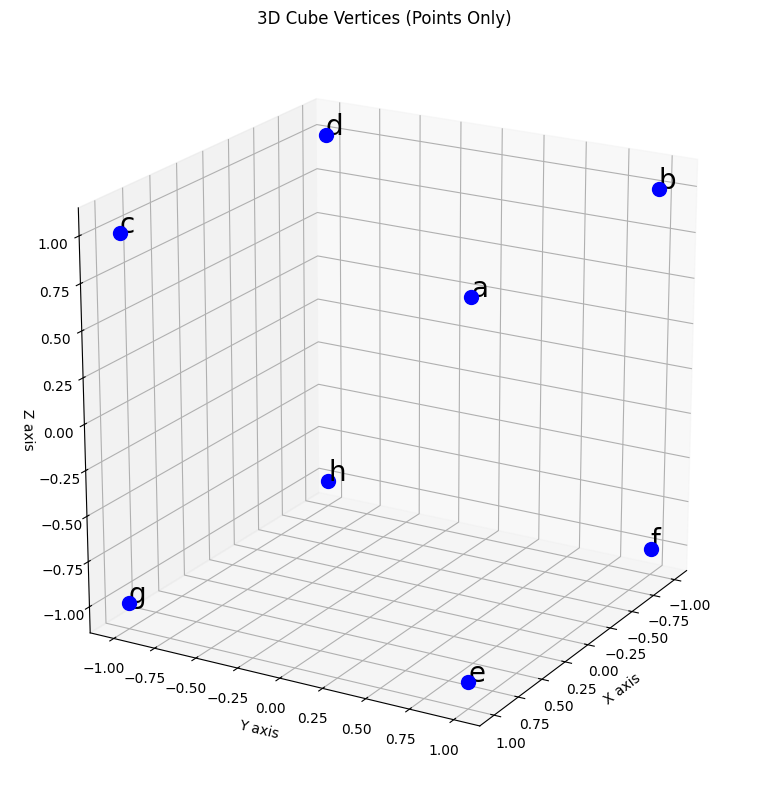

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the vertices of the cube
vertices = {
    'a': (1, 1, 1),    # front top right
    'b': (-1, 1, 1),   # front top left
    'c': (1, -1, 1),  # front bottom left
    'd': (-1, -1, 1),   # front bottom right
    'e': (1, 1, -1),   # back top right
    'f': (-1, 1, -1),  # back top left
    'g': (1, -1, -1), # back bottom left
    'h': (-1, -1, -1)   # back bottom right
}

# Create a new figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each vertex as a point with label
for vertex, coords in vertices.items():
    ax.scatter(coords[0], coords[1], coords[2], color='blue', s=100)
    ax.text(coords[0], coords[1], coords[2], vertex, fontsize=20, color='black')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Cube Vertices (Points Only)')

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

# Adjust viewing angle
ax.view_init(elev=20, azim=30)

plt.tight_layout()
plt.show()

## 3D to 2D Projection: The Mathematics

Our next task is to project our 3D cube onto a 2D image plane. This conversion from 3D to 2D is a fundamental concept in computer graphics.

-  Projection Steps:
    1. **Map 3D vertices to 2D points** - Using a projection technique (such as perspective or orthographic projection)
    2. **Connect corresponding 2D points** - Draw straight lines between the projected vertices to represent the cube's edges

`How?`

The answer is **Perspective projection**, where objects look smaller as they get farther away. This is mathematically explained using the pinhole camera model:

<img src="./Assets/Pinhole-camera.svg.png" alt="Pinhole Camera" width="500" />

<img src="./Assets/side_view.png" alt="Pinhole Camera Side View" width="500" />

### Mathematical Transformation

When a 3D point P(x,y,z) is projected to a 2D point Q(u,v) on the image plane:

- If the camera (pinhole) is at the origin (0,0,0)
- And the image plane is at distance f from the origin (along the z-axis)

Then by similar triangles:
- u = f * (x/z)
- v = f * (y/z)

This is because:
- When z increases (point is farther away), u and v decrease (point appears smaller)
- The ratio of distances in 3D space is preserved in the 2D projection
- The perspective effect naturally emerges from this division by z

This transformation captures how our eyes and cameras perceive the 3D world on a 2D surface, creating the realistic depth illusion in 2D images.


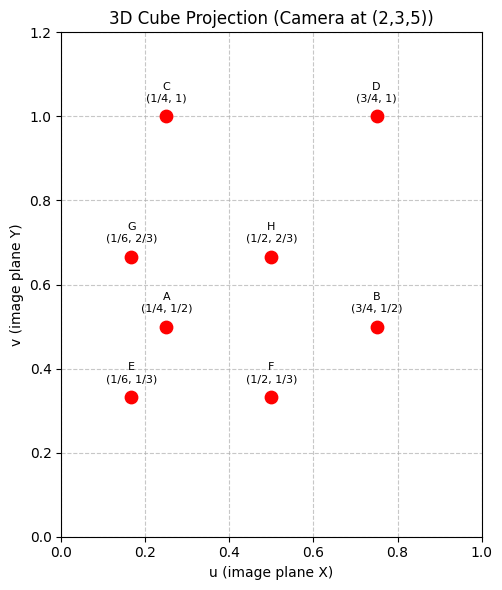

In [3]:
import matplotlib.pyplot as plt
from fractions import Fraction

# Define vertices and edges
vertices_3d = {
    'A': (1, 1, 1),
    'B': (-1, 1, 1),
    'C': (1, -1, 1),
    'D': (-1, -1, 1),
    'E': (1, 1, -1),
    'F': (-1, 1, -1),
    'G': (1, -1, -1),
    'H': (-1, -1, -1)
}

# Camera position
camera = (2, 3, 5)

# Project vertices to 2D
vertices_2d = {}
for name, (X, Y, Z) in vertices_3d.items():
    # Step 1: Subtract camera position
    x = X - camera[0]
    y = Y - camera[1]
    z = Z - camera[2]
    
    # Step 2: Perspective projection (f=1)
    u_frac = Fraction(x, z).limit_denominator()
    v_frac = Fraction(y, z).limit_denominator()
    
    # Store results
    vertices_2d[name] = {
        'coords': (float(u_frac), float(v_frac)),
        'label': (f"{u_frac}", f"{v_frac}")
    }

# Create plot
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot vertices with labels
for name, data in vertices_2d.items():
    u, v = data['coords']
    u_label, v_label = data['label']
    
    # Plot point
    ax.scatter(u, v, color='red', s=80, zorder=3)
    
    # Add text label with fractions
    ax.text(u, v + 0.03, f"{name}\n({u_label}, {v_label})", 
            ha='center', va='bottom', fontsize=8)

# Configure plot
plt.title("3D Cube Projection (Camera at (2,3,5))")
plt.xlabel("u (image plane X)")
plt.ylabel("v (image plane Y)")
plt.grid(True, linestyle='--', alpha=0.7)
ax.set_aspect('equal')

# Set axis limits to match example image
plt.xlim(0, 1)
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()

## From 3D to 2D: The Rasterization Process

Once we've projected our 3D vertices onto the 2D image plane using perspective projection, we need to visualize these 2D points by connecting them with lines. This process involves rasterization - converting continuous mathematical objects into a discrete pixel representation.

### The Pixel Grid Representation

Digital displays represent images as a grid of discrete pixels. When we render lines between our projected vertices, we need to determine which pixels should be illuminated to best represent the continuous mathematical line.

<img src="./Assets/pixel.png" alt="Pixel" width="500" />


### Line Rasterization Algorithms

Several algorithms exist for determining which pixels to illuminate:

1. **Bresenham's Algorithm** - An efficient integer-based approach that determines which pixels lie closest to the ideal line
2. **Diamond Rule** - Used by modern GPUs to determine pixel coverage


### Bresenham's Line Algorithm (Integer-only)



#### Key Features:

- Uses only integer arithmetic (fast)
- No anti-aliasing (jagged lines)
- Sequential (pixels calculated one by one)
- Time complexity: O(n) where n = max(Δu, Δv)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

# Configure matplotlib
%matplotlib inline
plt.rcParams['animation.html'] = 'jshtml'
plt.style.use('seaborn-v0_8-pastel')

# ========================
# BRESENHAM'S ALGORITHM 
# ========================
def bresenham_line(x1, y1, x2, y2):
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            points.append((x, y, err))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            points.append((x, y, err))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    points.append((x, y, 0))
    return points

# ========================
# VISUALIZATION SETUP
# ========================
u1, v1 = 2, 3
u2, v2 = 5, 5
steps = bresenham_line(u1, v1, u2, v2)

fig = plt.figure(figsize=(10, 8), layout="constrained")
ax = fig.add_subplot(111)
ax.set_xlim(0.5, 6.5)
ax.set_ylim(1.5, 6.5)
ax.set_xticks(np.arange(1, 7))
ax.set_yticks(np.arange(2, 7))
ax.grid(True, linestyle=':', alpha=0.4)
ax.set_title("Bresenham's Line Algorithm\n(With Ideal Line Reference)", 
             fontsize=14, pad=20)

# Draw IDEAL line (now clearly visible as dashed blue)
ideal_line = ax.plot([u1, u2], [v1, v2], 'b--', 
                    alpha=0.7, linewidth=2.5,
                    label='Ideal mathematical line', 
                    zorder=3)[0]

# Initialize RASTERIZED line (starts empty)
raster_line, = ax.plot([], [], 'ro-', markersize=10, linewidth=2, 
                      alpha=1, label='Rasterized pixels', zorder=4)

# Pixel grid with coordinates
for x in range(1, 7):
    for y in range(2, 7):
        pixel = plt.Rectangle((x-0.5, y-0.5), 1, 1,
                             facecolor='white', edgecolor='lightgray',
                             linewidth=1.5, zorder=2)
        ax.add_patch(pixel)
        ax.text(x, y, f'{x},{y}', ha='center', va='center', 
                fontsize=9, color='gray', zorder=3)

# Info box at top
info_box = plt.Rectangle((0.5, 6.1), 6, 0.8, 
                        facecolor='whitesmoke', edgecolor='silver',
                        linewidth=1, zorder=5)
ax.add_patch(info_box)

# Text elements
step_text = ax.text(0.6, 6.6, '', fontsize=12, weight='bold', color='#2c3e50', zorder=6)
decision_text = ax.text(0.6, 6.3, '', fontsize=11, color='#e74c3c', zorder=6)
error_text = ax.text(3.5, 6.3, '', fontsize=11, color='#3498db', zorder=6)
path_text = ax.text(0.6, 6.0, '', fontsize=10, color='#27ae60', zorder=6)

# Current pixel marker
current_pixel = ax.add_patch(plt.Rectangle((1.5, 2.5), 1, 1,
                            facecolor='#e74c3c', alpha=0.3, 
                            edgecolor='#c0392b', linewidth=2,
                            zorder=7))

# ========================
# ANIMATION FUNCTION
# ========================
def update(frame):
    u, v, err = steps[frame]
    
    # Update current pixel
    current_pixel.set_xy((u-0.5, v-0.5))
    
    # Update rasterized line (grows with each step)
    raster_line.set_data([s[0] for s in steps[:frame+1]], 
                        [s[1] for s in steps[:frame+1]])
    
    # Update info texts
    step_text.set_text(f'Step {frame+1}/{len(steps)}: Pixel ({u}, {v})')
    
    if frame < len(steps)-1:
        next_u, next_v, _ = steps[frame+1]
        move = "RIGHT + UP" if next_v != v else "RIGHT"
        decision_text.set_text(f'Decision: Move {move}')
        error_text.set_text(f'Error = {err:.1f} → {"Move UP" if err >=0 else "Move RIGHT"}')
    else:
        decision_text.set_text('Final pixel reached!')
        error_text.set_text('')
    
    path_text.set_text(f'Path: {[s[:2] for s in steps[:frame+1]]}')
    
    return current_pixel, raster_line, step_text, decision_text, error_text, path_text

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(steps),
    interval=1500, blit=True
)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.close()
HTML(ani.to_jshtml())

### Diamond Rule (GPU-style)


Key Features:
- Uses floating-point math
- Anti-aliasing (smooth edges via coverage blending)
- Parallelizable (pixels can be tested independently)
- Used in modern GPUs (fragment shaders)
- More computationally expensive

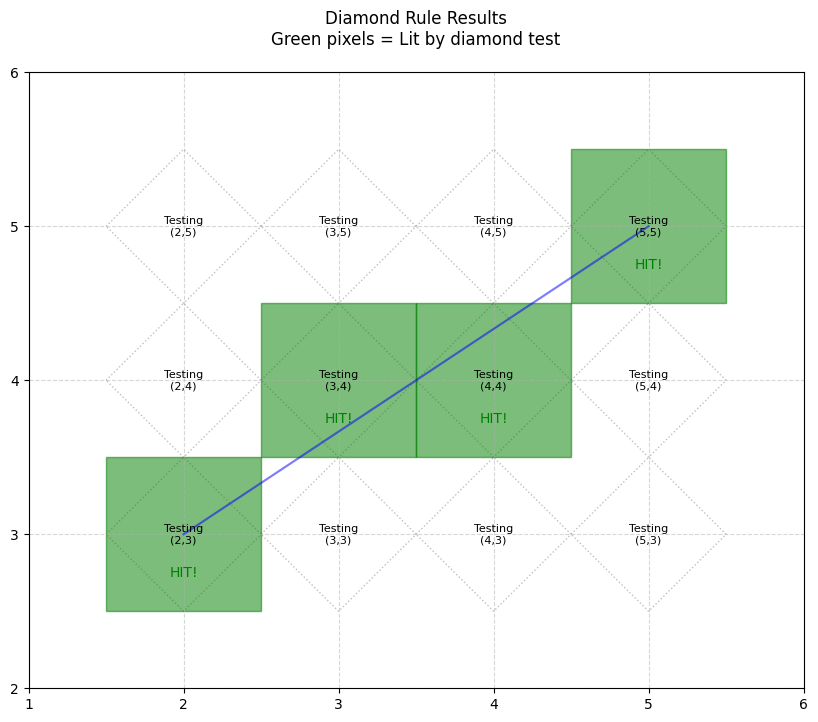

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from IPython.display import display, clear_output
import time

# Configure for Jupyter
%matplotlib inline

# Line from (2,3) to (5,5)
u1, v1 = 2, 3
u2, v2 = 5, 5

# Create parametric line (100 points)
t = np.linspace(0, 1, 100)
line_u = u1 + t*(u2 - u1)
line_v = v1 + t*(v2 - v1)

# Set up figure
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(1, 6)
ax.set_ylim(2, 6)
ax.set_xticks(np.arange(1, 7))
ax.set_yticks(np.arange(2, 7))
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Diamond Rule Rasterization\n(Line from (2,3) to (5,5))", pad=20)

# Draw the ideal line
ax.plot(line_u, line_v, 'b-', alpha=0.3, label='Ideal line')

# Draw all pixel diamonds
for x in range(2, 6):
    for y in range(3, 6):
        diamond = Polygon([
            [x-0.5, y], [x, y+0.5], 
            [x+0.5, y], [x, y-0.5]
        ], fill=None, edgecolor='gray', linestyle=':', alpha=0.5)
        ax.add_patch(diamond)

# Highlight pixels where line crosses diamonds
hit_pixels = []
for x in range(2, 6):
    for y in range(3, 6):
        # Diamond boundaries
        left = x - 0.5
        right = x + 0.5
        top = y + 0.5
        bottom = y - 0.5
        
        # Check if line intersects diamond
        for i in range(len(line_u)-1):
            u1_seg, u2_seg = line_u[i], line_u[i+1]
            v1_seg, v2_seg = line_v[i], line_v[i+1]
            
            # Check intersection with diamond edges
            # (Simplified collision detection)
            if (left <= u1_seg <= right and 
                bottom <= v1_seg <= top and
                abs(u1_seg - x) + abs(v1_seg - y) <= 0.5):
                hit_pixels.append((x, y))
                break

# Animate the diamond tests
for x in range(2, 6):
    for y in range(3, 6):
        # Highlight current diamond being tested
        test_diamond = Polygon([
            [x-0.5, y], [x, y+0.5], 
            [x+0.5, y], [x, y-0.5]
        ], fill=True, edgecolor='red', facecolor='red', alpha=0.3)
        ax.add_patch(test_diamond)
        ax.text(x, y, f'Testing\n({x},{y})', ha='center', va='center', fontsize=8)
        
        # Check if this pixel was hit
        if (x,y) in hit_pixels:
            ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color='green', alpha=0.3))
            ax.text(x, y-0.25, 'HIT!', ha='center', va='center', color='green', fontsize=10)
        
        display(fig)
        clear_output(wait=True)
        time.sleep(1.5)  # Pause between tests
        test_diamond.remove()  # Remove highlight after test

# Final result
ax.plot(line_u, line_v, 'b-', alpha=0.3)
for (x,y) in hit_pixels:
    ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color='green', alpha=0.3))
ax.set_title("Diamond Rule Results\nGreen pixels = Lit by diamond test", pad=20)
plt.show()

## Complete 3D to 2D Projection Pipeline

Let's bring everything together to visualize the complete 3D to 2D projection pipeline:

1. A 3D cube with 8 vertices and 12 edges
2. Camera positioned in 3D space 
3. Perspective projection onto 2D image plane
4. Edge rasterization following Bresenham's algorithm

The diagram below shows the entire process from defining 3D geometry to rendering the final 2D image:

<img src="./Assets/output.png" alt="Complete 3D to 2D Projection" width="80%" />
